# "Neural Network Application"


## The main application of this project will talk about "Handwrittend classification"
__Firstly will talk about little small topics to know what we are using__
___The data set is "MNIST : Modified National Institute of Standards and Technology dataset" : It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9___
# So our topic will handle Digit Recognition Using __MNIST__
___our task is to classify the integer numbers from 0 to 9 using CNN "is a type of deep neural network commonly used for computer vision applications" that will be able to recognize the handwritten digits___
## and to apply that will need for the main module of Neural network "tensorflow" and use Keras api
__Keras is a Python library and is highly recommended for beginners due to its smooth learning curve__

In [2]:
# Import all required modules
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf

In [3]:
# Second step is to unpack and load MNIST data
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
# X train contain the images of 0 to 9 , y train contain these numbers

In [4]:
# Let's do some analysis 
print(len(x_train),len(y_train),len(x_test),len(y_test)) # Number of data set in every variable
print(x_train[0].shape) # 28x28 pixels

60000 60000 10000 10000
(28, 28)


In [5]:
x_train[0] # Print the background data of the first image
# 0 tends to black and 255 tends to white

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

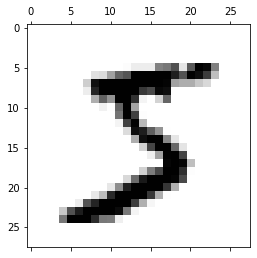

In [6]:
# of first image
plt.matshow(x_train[0],cmap=plt.cm.binary)

In [7]:
y_train[0]

5

# _Normalization of the data_

In [8]:
# normalizing our data to range from 0 to 1 instead of 0 to 255 to simplize it 
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [9]:
x_test[0] # After getting normalized

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

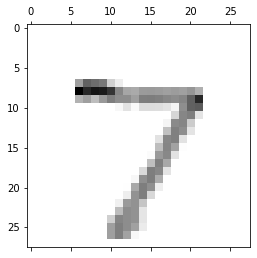

In [10]:
plt.matshow(x_test[0],cmap=plt.cm.binary) #color after normalized

## Building the suitable model for our project

In [11]:
# It just means things are going to go in direct order as a forward way 
model = tf.keras.models.Sequential()

In [12]:
# now we have to flatten the pic from 28*28 to 1*784
model.add(tf.keras.layers.Flatten())
# This way will make it easier to input layer for our neural network

In [13]:
#creating a 2 hidden layers of 128 node with activation function relu "Relu means a linear function that will output the input directly if it is positive, otherwise, it will output zero"
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) 
#adding the output layer consist of 10 nodes represent the 10 digits with softmax AF
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
# is a function that turns a vector of K real values into a vector of K real values that sum to 1.
# The input values can be positive, negative, zero, or greater than one,
# but the softmax transforms them into values between 0 and 1
#,so that they can be interpreted as probabilities

In [14]:
#This is where we pass the settings for actually optimizing/training the model we've defined
# adam optimizer is a replacement optimization algorithm for stochastic gradient descent for training deep learning models
# sparse_Categorical_crossentropy : Used as a loss function for multi-class classification model where the output label is assigned integer value
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
# Now fit operation
# epoch means training the neural network with all the training data for one cycle "How many time the model will see the data"
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0535 - accuracy: 0.9829
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0410 - accuracy: 0.9872
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0327 - accuracy: 0.9891


In [24]:
#lets evaluate our model 
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0968 - accuracy: 0.9744
0.09684257954359055
0.974399983882904


313/313 [==============================] - 1s 1ms/step
[1.9369444e-09 6.5639938e-09 1.1808798e-05 9.4007046e-05 1.3469353e-10
 1.8235779e-07 4.9027636e-14 9.9989378e-01 1.2299933e-08 1.0490558e-07]


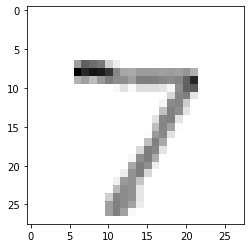

In [17]:
# Now let's creat a predication
predict = model.predict(x_test)
print(predict[0])
#lets plot it up
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [18]:
n_images = 8
test_images = x_test[:n_images]
predictions = model.predict(test_images)

1/1 [==============================] - 0s 19ms/step


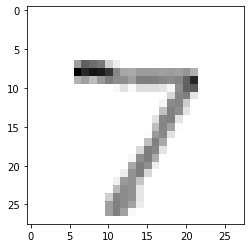

Model prediction: 7


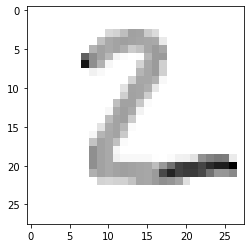

Model prediction: 2


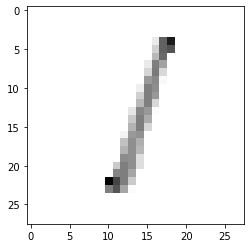

Model prediction: 1


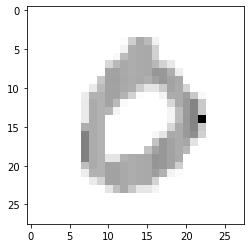

Model prediction: 0


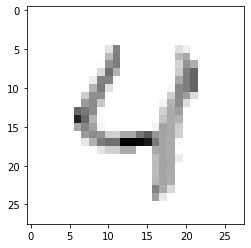

Model prediction: 4


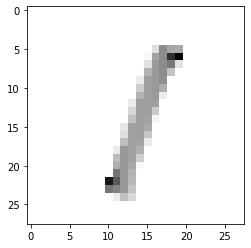

Model prediction: 1


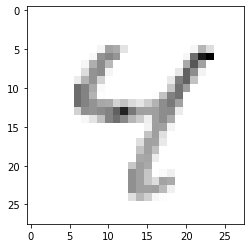

Model prediction: 4


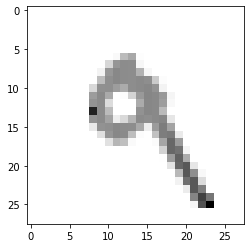

Model prediction: 9


In [25]:
# Display image and model prediction.
for i in range(n_images):
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.show()
    print(f"Model prediction: {np.argmax(predictions[i])}")



In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
